In [160]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movies_data.csv")

In [106]:
df.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [90]:
genre = df.iloc[:,-7:].columns.tolist()
print genre

['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']


In [98]:
print sorted(df.year.unique())

[1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]


In [107]:
print len(df)
print len(df.loc[df.budget > 0])
print len(df.loc[df.mpaa > 0])

58788
5183
4924


In [18]:
# x = df.iloc[:,-7:].stack()
# pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))

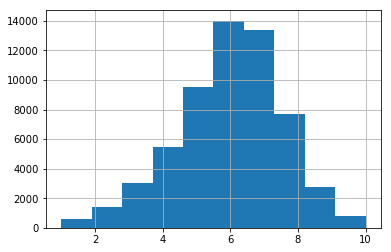

In [19]:
df.rating.hist()

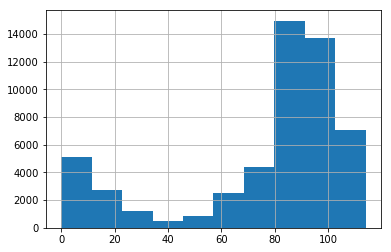

In [109]:
df.length.hist(range=[0,df.length.quantile(.9)])

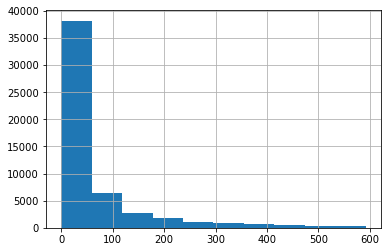

In [26]:
df.votes.hist(range=[0,df.votes.quantile(.9)])

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,8))
plt.boxplot(df,labels=lable,showfliers=True,notch=0, sym='.', vert=1, whis=1.5)

## 1. number of movies in each genre

In [5]:
genre = df.iloc[:,-7:].columns.tolist()
genre

['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']

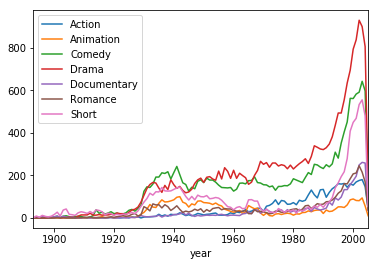

In [110]:
year = df.groupby('year').sum().iloc[:,-7:]
year.plot()

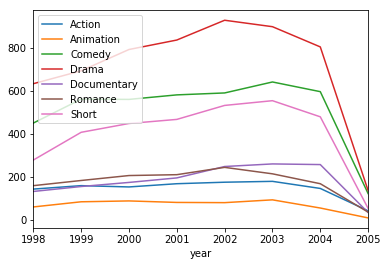

In [18]:
year[105:].plot()

## 2. percent of movie has rating higher than 7 in each genre

In [75]:
higher = df.loc[df.rating > 7].groupby('year').sum().iloc[:,-7:]

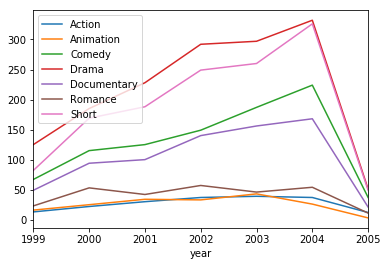

In [64]:
higher[95:].plot()

In [80]:
higher.iloc[95:]

,Action,Animation,Comedy,Drama,Documentary,Romance,Short
year,,,,,,,
1999,13,16,67,125,49,23,82
2000,22,25,115,185,94,53,169
2001,30,34,125,228,100,42,188
2002,37,33,149,292,140,57,249
2003,39,43,187,297,156,46,260
2004,37,26,224,332,168,54,326
2005,12,3,37,51,21,11,49


In [84]:
year.iloc[106:]

,Action,Animation,Comedy,Drama,Documentary,Romance,Short
year,,,,,,,
1999,160,85,562,694,156,184,408
2000,154,89,561,793,175,207,449
2001,169,82,582,837,196,211,468
2002,176,81,591,929,249,245,533
2003,180,94,642,899,261,215,555
2004,147,56,597,805,258,169,480
2005,43,10,123,137,35,37,54


In [85]:
perc = higher.iloc[95:].divide(year.iloc[106:],axis="index")

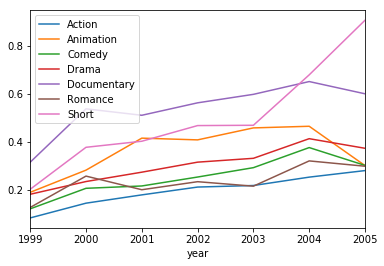

In [87]:
perc.plot()

## 3. average rating of movies in each genre

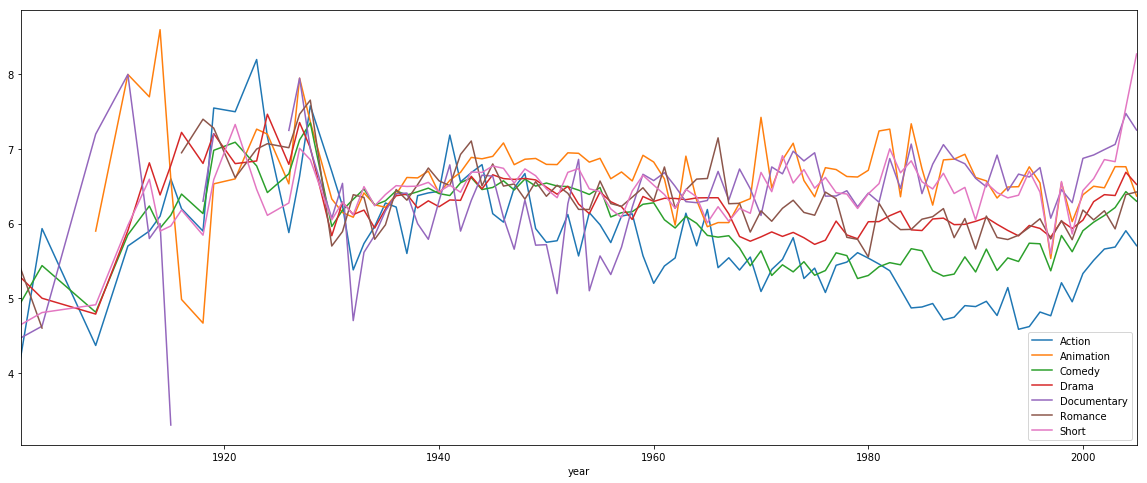

In [114]:
rating = pd.DataFrame()
for g in genre:
    rating[g] = df.loc[df[g] == 1].groupby('year')['rating'].mean()

fig = rating.plot(figsize=(20,8))

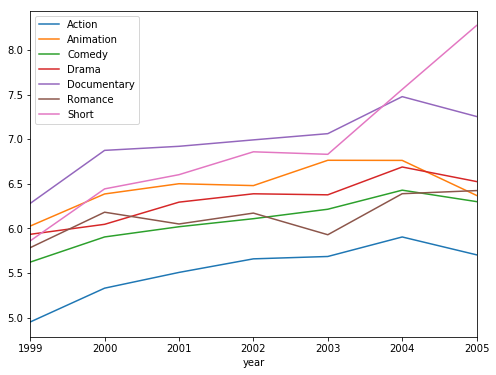

In [116]:
rating[85:].plot(figsize=(8,6))

## 4. relationships between length and rating

In [167]:
recent = df.loc[df.year > 1998]

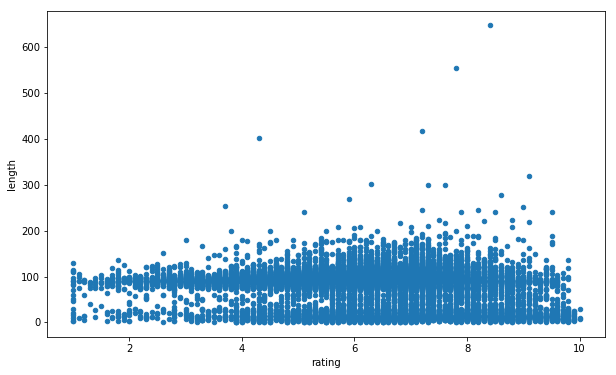

In [176]:
fig, ax = plt.subplots()
recent.plot(ax=ax, kind='scatter', x='rating', y='length', figsize=(10,6))

## 5. relationships between rating and other features

In [119]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split

D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [161]:
rating = np.asarray(df['rating'], dtype="|S6")
features = df[['year','length','votes','Action','Animation','Comedy','Drama','Documentary','Romance','Short']].as_matrix()
len(rating) == len(features)

True

In [162]:
X_train, X_test, y_train, y_test = train_test_split(features, rating, test_size=0.3, random_state=42)

In [163]:
print len(X_train)
print len(y_train)

41151
41151


In [164]:
clf = AdaBoostClassifier()

In [165]:
clf.fit(X_train, y_train)
pred =  clf.predict(X_test)

In [166]:
clf.feature_importances_

array([ 0.5 ,  0.46,  0.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])